In [1]:
import pandas as pd
import numpy as np
import random
import plotly as px
import plotly_express as go

import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import warnings

color_pal = sns.color_palette("husl", 9)
warnings.filterwarnings('ignore')


import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


In [2]:
df = pd.read_excel('predictive analysis.xlsx')
df

,TEMPERATURE SHT,DATE
0,22.85,2024-08-30 12:50:00
1,22.85,2024-08-30 12:50:00
2,22.81,2024-08-30 12:51:00
3,22.84,2024-08-30 12:51:00
4,22.82,2024-08-30 12:52:00
...,...,...
16477,22.80,2024-09-16 11:40:00
16478,22.90,2024-09-16 11:40:00
16479,17.90,2024-09-16 11:44:00
16480,23.40,2024-09-16 11:43:00


In [3]:
df.describe()

,TEMPERATURE SHT,DATE
count,16482.000000,16482
mean,20.168771,2024-09-08 11:07:44.832180736
min,3.910000,2024-08-30 10:49:32
25%,19.560000,2024-09-04 14:48:11.500000
50%,20.520000,2024-09-08 08:31:50.500000
75%,21.480000,2024-09-13 10:05:00
max,29.100000,2024-09-16 11:45:00
std,3.284785,NaN


In [4]:

df.tail()



,TEMPERATURE SHT,DATE
16477,22.8,2024-09-16 11:40:00
16478,22.9,2024-09-16 11:40:00
16479,17.9,2024-09-16 11:44:00
16480,23.4,2024-09-16 11:43:00
16481,23.8,2024-09-16 11:45:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16482 entries, 0 to 16481
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TEMPERATURE SHT  16482 non-null  float64       
 1   DATE             16482 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 257.7 KB


In [6]:
df = df.set_index('DATE')
df.index = pd.to_datetime(df.index)

In [7]:
df.index

DatetimeIndex(['2024-08-30 12:50:00', '2024-08-30 12:50:00',
               '2024-08-30 12:51:00', '2024-08-30 12:51:00',
               '2024-08-30 12:52:00', '2024-08-30 12:52:00',
               '2024-08-30 12:53:00', '2024-08-30 12:53:00',
               '2024-08-30 12:53:00', '2024-08-30 12:54:00',
               ...
               '2024-09-16 11:31:00', '2024-09-16 11:34:00',
               '2024-09-16 11:35:00', '2024-09-16 11:35:00',
               '2024-09-16 11:39:00', '2024-09-16 11:40:00',
               '2024-09-16 11:40:00', '2024-09-16 11:44:00',
               '2024-09-16 11:43:00', '2024-09-16 11:45:00'],
              dtype='datetime64[ns]', name='DATE', length=16482, freq=None)

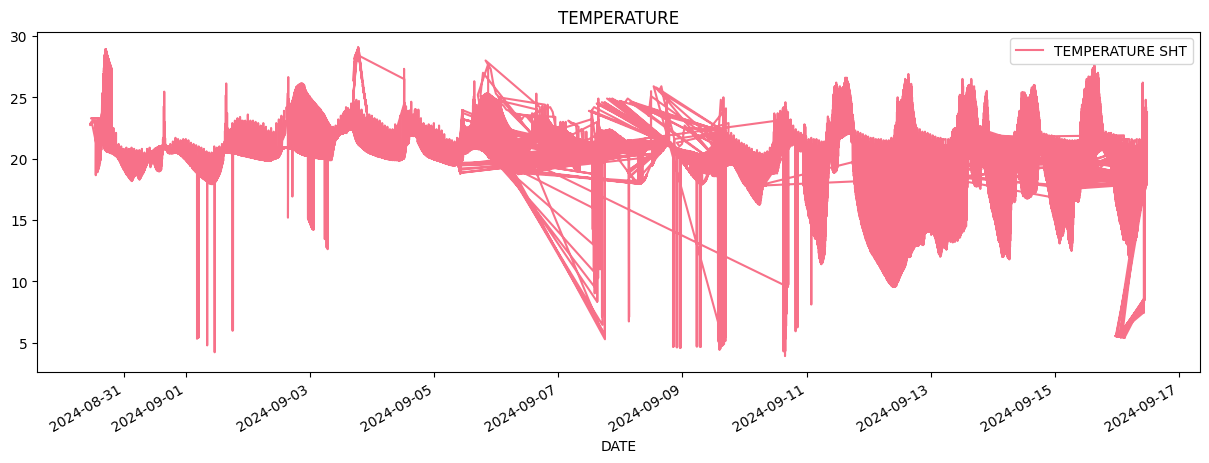

In [8]:
df.plot(kind='line',
        figsize=(15, 5),
        color=color_pal[0],
        title='TEMPERATURE')
plt.show()

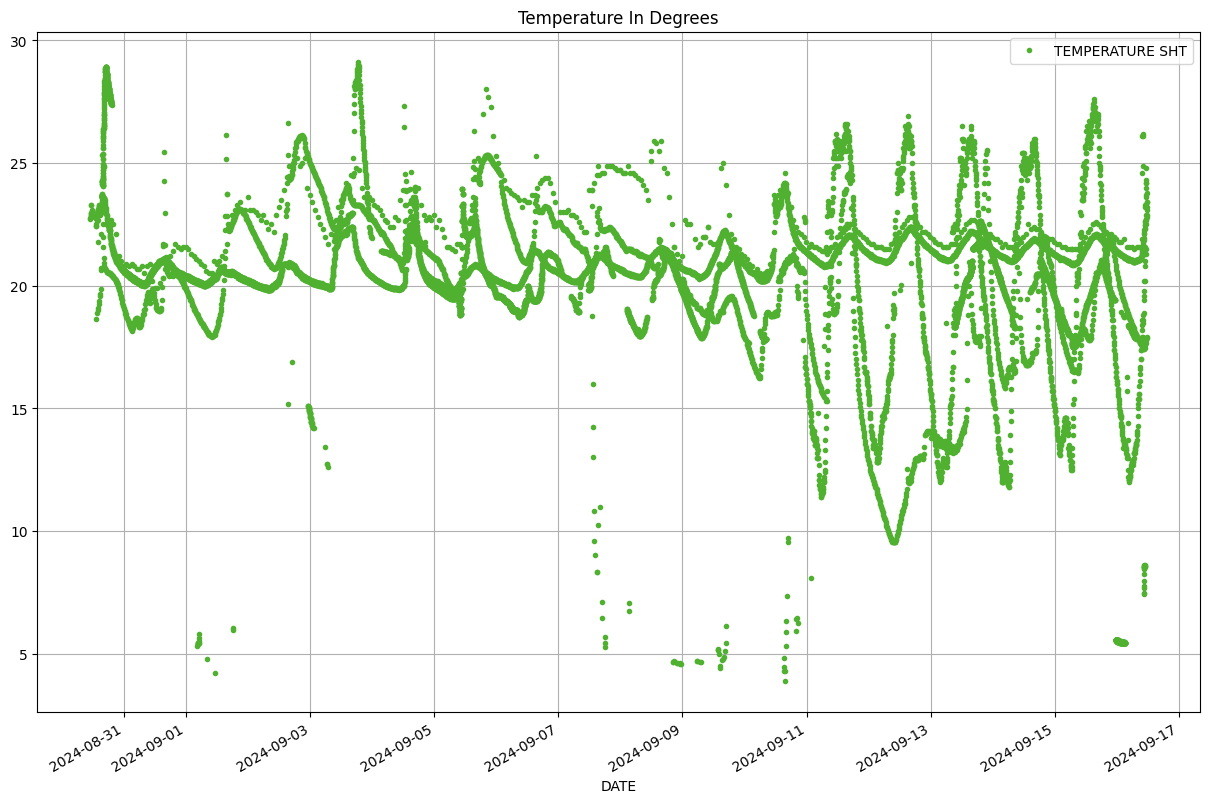

In [9]:
# Setting Datetime column as index
df.plot(style='.',figsize=(15,10),color=color_pal[3],title='Temperature In Degrees')
plt.grid()

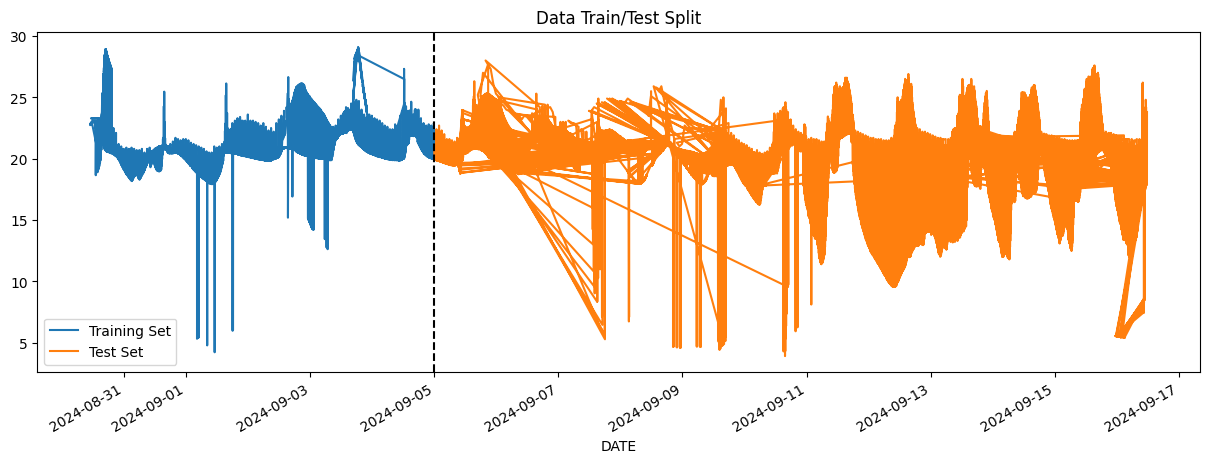

In [14]:
train = df.loc[df.index < '2024-09-05']
test = df.loc[df.index >= '2024-09-05']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label="Training Set", title="Data Train/Test Split")
test.plot(ax=ax, label="Test Set")

ax.axvline('2024-09-05', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()         